<a href="https://colab.research.google.com/github/Andrew-1993/final_project_sda/blob/master/final_project_sda%20KADRI%20DRAFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SDA FINAL PROJECT KADRI & ANDREI

**Project name:** Microsoft Stocks Price Prediction

**Project goal:** Predict Microsoft stock price as accurate as possible using different models

Shape of data: 1259 data rows & 7 features (columns) 
Date – the date when the transactions happened 

*   Open – opening price, the price from the first transaction of that day
*   High – the highest price of the day 
*   Low – the lowest price of the day 
*   Close – Closing price, the price at which the share closed at the end of 
*   Adj Close - Adjusted closing price (closing price adjusted for corporate actions such as dividend payouts, stock splits, or the issuance of more shares)
*   Volume – the number of shares traded that day 

What data from that do we need to build our model 

*   Date – to find historical connections, patterns, trends over time, identify seasonality etc.
*   Close – the model will predict the close price, which is important in determining the performance of a stock.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import os
import datetime as dt

# READING AND WORKING WITH DATA

Reading the data and checking the dataframe (what type of data, are there NULL values)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/MSFT.csv', )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-05,92.339996,94.269997,92.260002,93.639999,88.375061,23901600
1,2018-03-06,94.339996,94.489998,92.940002,93.320000,88.073044,22175800
2,2018-03-07,93.160004,93.940002,92.430000,93.860001,88.582703,26716100
3,2018-03-08,94.269997,95.099998,93.769997,94.430000,89.120636,25887800
4,2018-03-09,95.290001,96.540001,95.000000,96.540001,91.112022,36937300


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,199.090628,201.193709,196.870929,199.130850,195.081565,3.021245e+07
std,72.719266,73.478753,71.903922,72.727512,73.510435,1.281956e+07
min,87.849998,90.050003,87.080002,87.180000,82.278275,8.989200e+06
25%,129.854996,130.674995,128.925003,129.830001,124.598461,2.219930e+07
50%,209.559998,211.979996,206.979996,209.699997,204.974960,2.707320e+07
75%,257.584992,260.145004,254.444999,257.229995,254.736229,3.427080e+07
max,344.619995,349.670013,342.200012,343.109985,339.075592,1.112421e+08


In [ ]:
#Checking Null and N/A values
print("Null values:", df.isnull().values.sum())
print("NA values:", df.isna().values.any())

Null values: 0
NA values: False


In [ ]:
#Convert date to correct date format
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2018-03-05,2018-03-05,92.339996,94.269997,92.260002,93.639999,88.375061,23901600
2018-03-06,2018-03-06,94.339996,94.489998,92.940002,93.320000,88.073044,22175800
2018-03-07,2018-03-07,93.160004,93.940002,92.430000,93.860001,88.582703,26716100
2018-03-08,2018-03-08,94.269997,95.099998,93.769997,94.430000,89.120636,25887800
2018-03-09,2018-03-09,95.290001,96.540001,95.000000,96.540001,91.112022,36937300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-03-05 to 2023-03-03
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 78.7 KB


In [ ]:
#Exploratory Data Analysis
print("Start date: ",df.iloc[0][0])
print("End date: ", df.iloc[-1][0])
print("Duration: ", df.iloc[-1][0]-df.iloc[0][0])

Start date:  2018-03-05 00:00:00
End date:  2023-03-03 00:00:00
Duration:  1824 days 00:00:00


In [ ]:
# converting days and months from numerics to categories
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['Weekday name'] = df['Date'].dt.strftime('%A')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Weekday name
Date,,,,,,,,,,,
2018-03-05,2018-03-05,92.339996,94.269997,92.260002,93.639999,88.375061,23901600,2018,3,5,Monday
2018-03-06,2018-03-06,94.339996,94.489998,92.940002,93.320000,88.073044,22175800,2018,3,6,Tuesday
2018-03-07,2018-03-07,93.160004,93.940002,92.430000,93.860001,88.582703,26716100,2018,3,7,Wednesday
2018-03-08,2018-03-08,94.269997,95.099998,93.769997,94.430000,89.120636,25887800,2018,3,8,Thursday
2018-03-09,2018-03-09,95.290001,96.540001,95.000000,96.540001,91.112022,36937300,2018,3,9,Friday
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,2023-02-27,252.460007,252.820007,249.389999,250.160004,250.160004,21190000,2023,2,27,Monday
2023-02-28,2023-02-28,249.070007,251.490005,248.729996,249.419998,249.419998,22491000,2023,2,28,Tuesday
2023-03-01,2023-03-01,250.759995,250.929993,245.789993,246.270004,246.270004,27565300,2023,3,1,Wednesday


# DATA ANALYZE

Starting to plot different plots in order to understand the data, how the data has changed during time, finding seasonalities, finding patterns, checkign correlations, price comparison. 

Text(0.5, 1.0, 'Stock Closing Price Over Time')

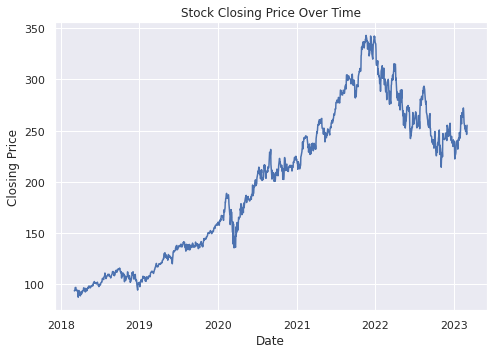

In [ ]:
fig = plt.figure()

axes1 = fig.add_axes([0, 0, 1, 1])

axes1.plot(df['Date'], df['Close'])

axes1.set_xlabel('Date')
axes1.set_ylabel('Closing Price')
axes1.set_title('Stock Closing Price Over Time')

<AxesSubplot:xlabel='Date', ylabel='Close'>

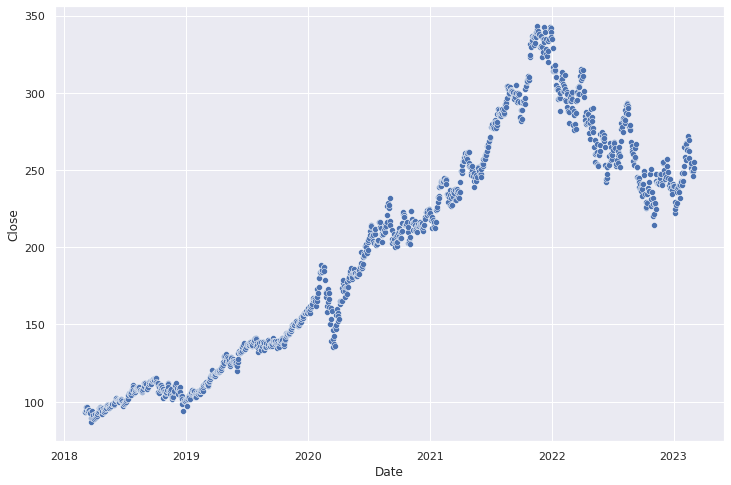

In [ ]:
#Trying scatterplot - not useful for time-series
plt.figure(figsize=(12,8)) 
sns.scatterplot(x='Date',y='Close',data=df)

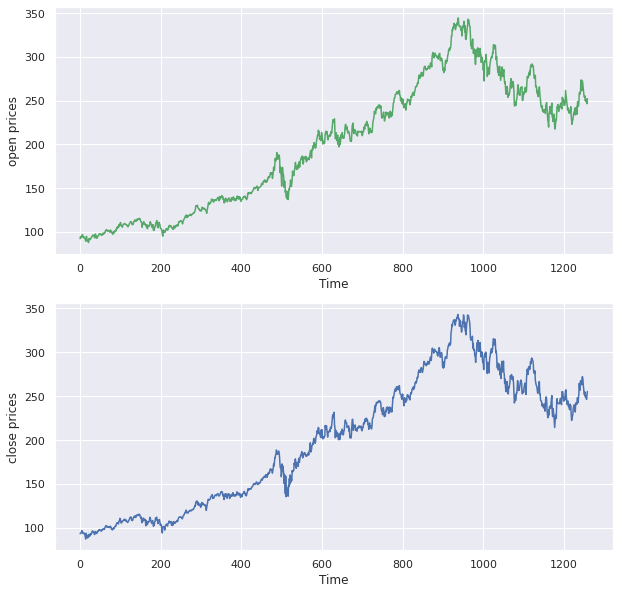

In [ ]:
f, axs = plt.subplots(2,2,figsize=(10,10))
plt.subplot(2,1,1)
open = df.Open.values.astype('float32')


plt.grid(True)
plt.xlabel('Time') 
plt.ylabel("open prices")
#plt.title(df)
plt.plot(open , 'g') 
    
    
plt.subplot(2,1,2)
close = df.Close.values.astype('float32')


plt.xlabel('Time') 
plt.ylabel("close prices")
#plt.title(df) 
plt.grid(True)
plt.plot(close , 'b')
plt.show()

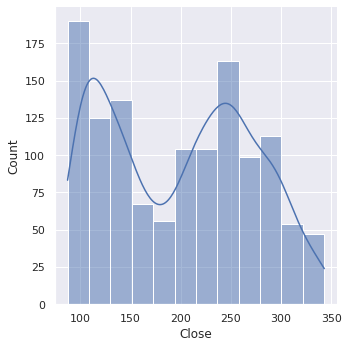

In [ ]:
sns.set(style='darkgrid')
sns.displot(data=df,x='Close',kde=True)

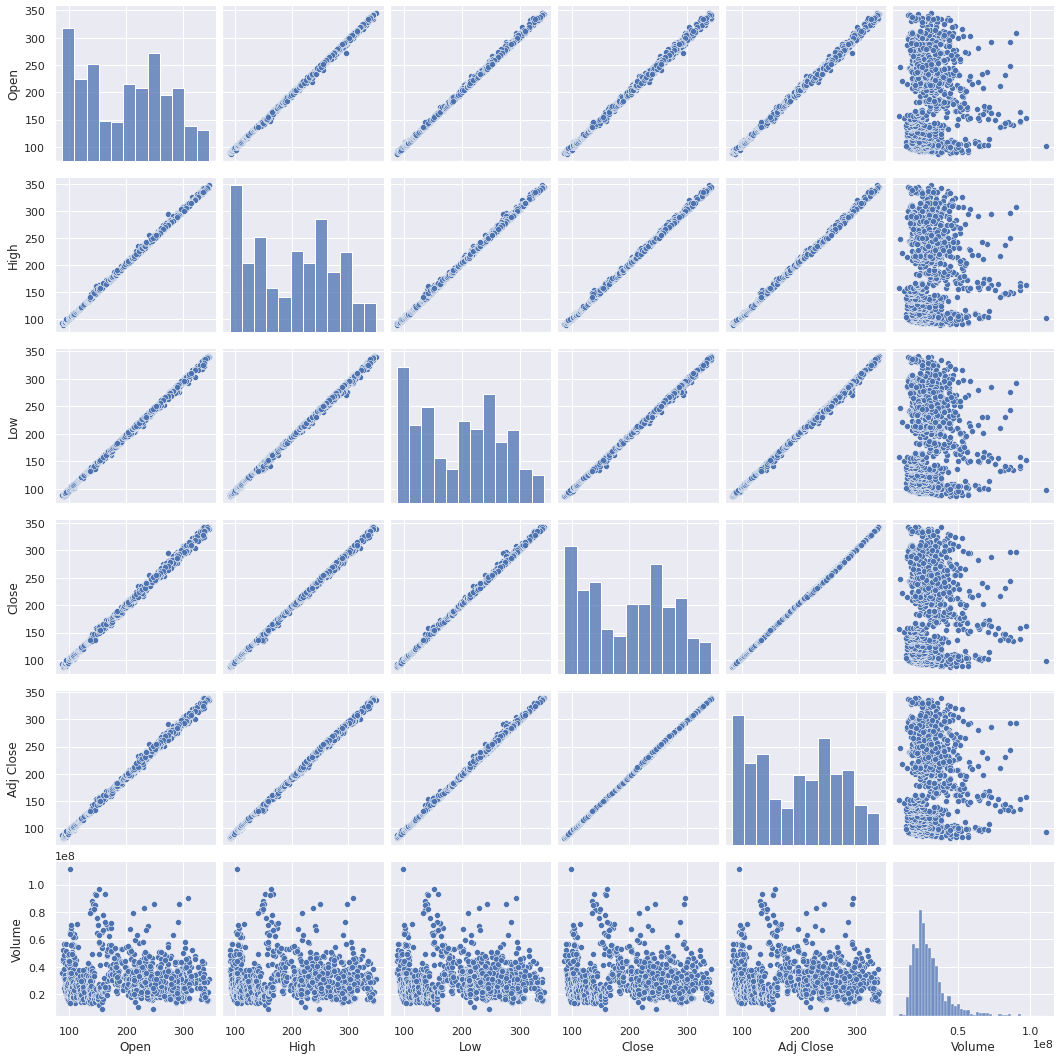

In [ ]:
sns.pairplot(df)

In [ ]:
df['Daily returns'] = df['Close'].pct_change() #Pandas dataframe.pct_change() function calculates the percentage change between the current and a prior element.
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,weekday_name,Daily returns
Date,,,,,,,,,,,,
2018-03-05,2018-03-05,92.339996,94.269997,92.260002,93.639999,88.375061,23901600,2018,3,5,Monday,NaN
2018-03-06,2018-03-06,94.339996,94.489998,92.940002,93.320000,88.073044,22175800,2018,3,6,Tuesday,-0.003417
2018-03-07,2018-03-07,93.160004,93.940002,92.430000,93.860001,88.582703,26716100,2018,3,7,Wednesday,0.005787
2018-03-08,2018-03-08,94.269997,95.099998,93.769997,94.430000,89.120636,25887800,2018,3,8,Thursday,0.006073
2018-03-09,2018-03-09,95.290001,96.540001,95.000000,96.540001,91.112022,36937300,2018,3,9,Friday,0.022345


In [ ]:
#Best Day of Stock
df[df['Daily returns']==df['Daily returns'].max()]['Daily returns']

Date
2020-03-13    0.142169
Name: Daily returns, dtype: float64

In [ ]:
#Worst day of Stock
df[df['Daily returns']==df['Daily returns'].min()]['Daily returns']

Date
2020-03-16   -0.14739
Name: Daily returns, dtype: float64

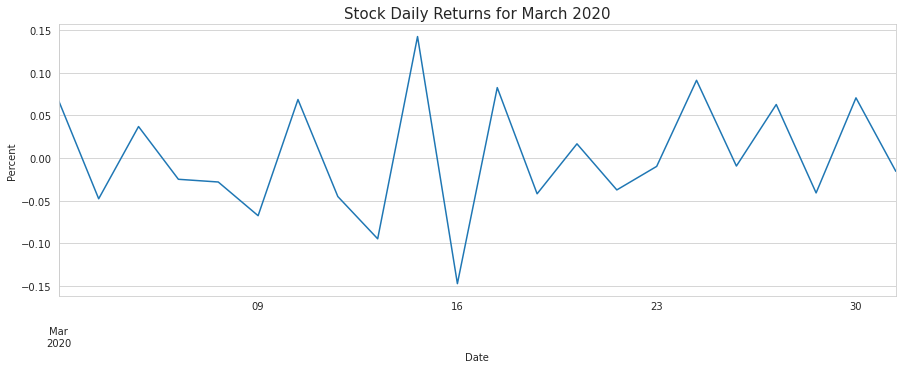

In [ ]:
start_date = '2020-03-01'
end_date = '2020-03-31'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df_march = df.loc[mask]

# plot the filtered data
plt.figure(figsize=(15,5))
df_march['Daily returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Stock Daily Returns for March 2020", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Stock Daily Returns')

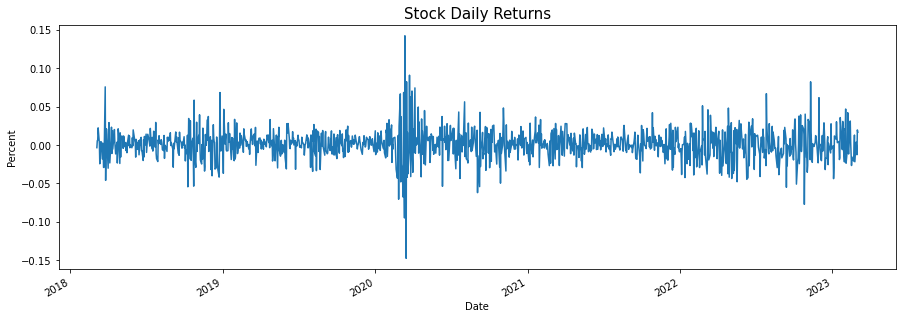

In [ ]:
plt.figure(figsize=(15,5))
df['Daily returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Stock Daily Returns",fontsize= 15 )

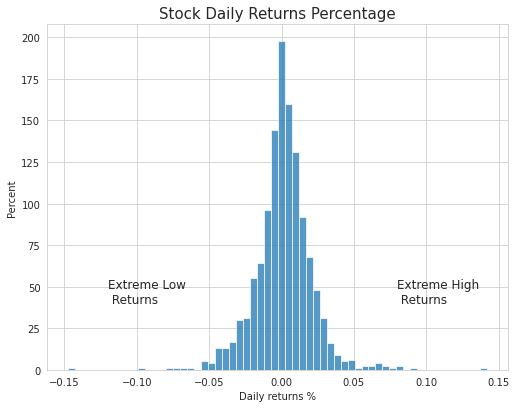

In [ ]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sns.histplot(data= df['Daily returns'], bins=60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Stock Daily Returns Percentage",fontsize= 15 )
ax1.text(-0.12,40,"Extreme Low\n Returns",fontsize= 12)
ax1.text(0.08,40,"Extreme High\n Returns", fontsize= 12)
plt.show()

In [ ]:
#Month comparision between open and close price
month_comp = df.groupby(df['Date'].dt.strftime('%B'))[['Open','Close']].mean()
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
month_comp = month_comp.reindex(order, axis=0)
month_comp

,Open,Close
Date,,
January,205.839406,205.631781
February,216.860632,217.028211
March,184.292343,184.400000
April,185.119519,184.898269
May,181.937619,181.993142
June,189.659056,189.990095
July,197.387924,197.615661
August,206.384054,206.570540
September,203.653923,203.098529


In [ ]:
month_comp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    12 non-null     float64
 1   Close   12 non-null     float64
dtypes: float64(2)
memory usage: 288.0+ bytes


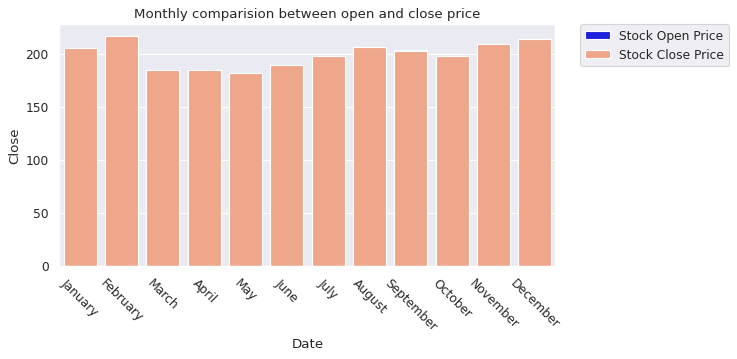

In [ ]:
plt.figure(figsize=(8,4),dpi=80)

sns.barplot(x=month_comp.index, y=month_comp['Open'], color='blue', label='Stock Open Price')
sns.barplot(x=month_comp.index, y=month_comp['Close'], color='lightsalmon', label='Stock Close Price')

plt.xticks(rotation=-45)
plt.title('Monthly comparision between open and close price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

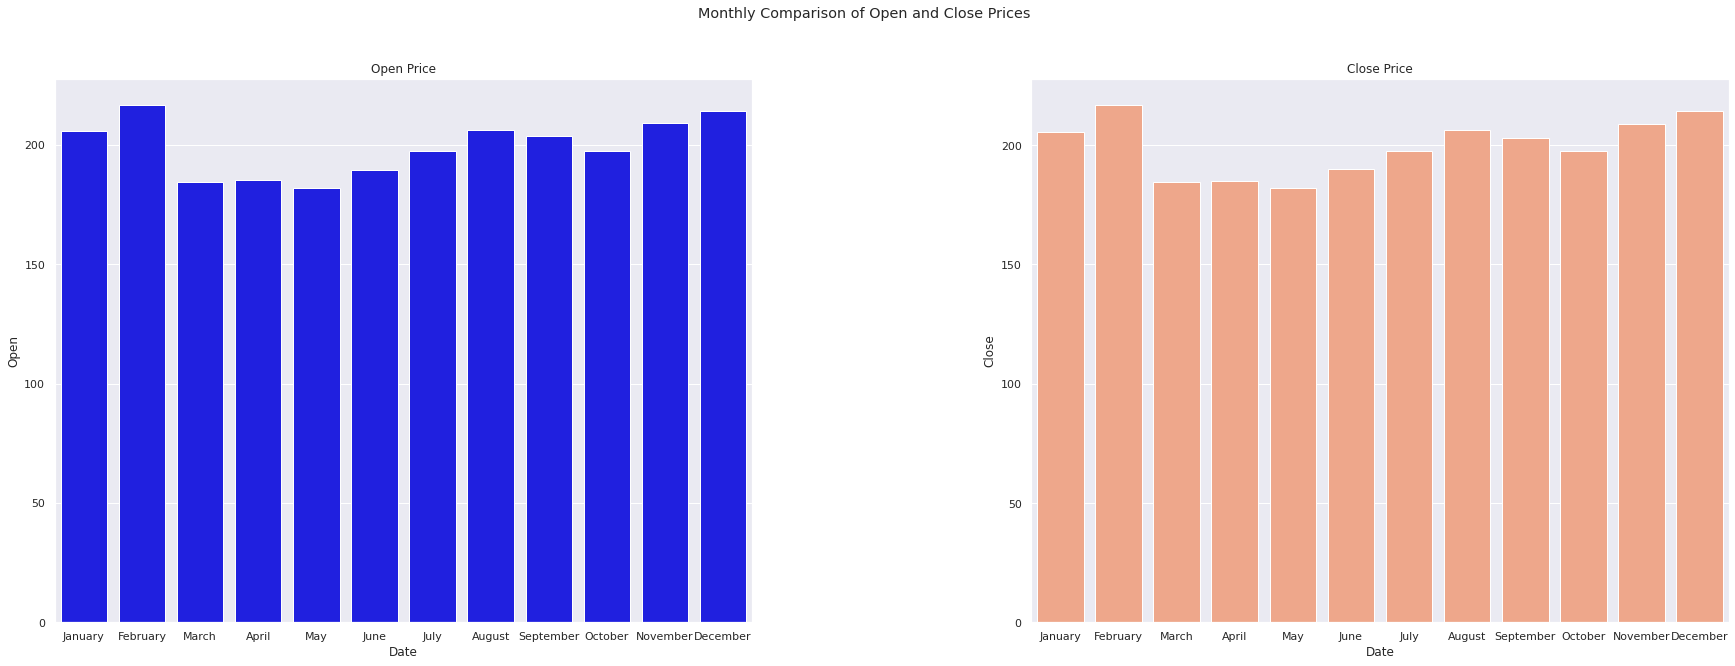

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

sns.barplot(x=month_comp.index, y=month_comp['Open'], color='blue', ax=axes[0])
axes[0].set_title('Open Price')


sns.barplot(x=month_comp.index, y=month_comp['Close'], color='lightsalmon', ax=axes[1])
axes[1].set_title('Close Price')

#plt.xticks(rotation=-45)
fig.subplots_adjust(wspace=0.4)
fig.suptitle('Monthly Comparison of Open and Close Prices')
plt.show()

In [ ]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=month_comp.index,
    y=month_comp['Open'],
    name='Stock Open Price',
    marker_color='lightblue'
))
fig.add_trace(go.Bar(
    x=month_comp.index,
    y=month_comp['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthly comparision between Stock open and close price')
fig.show()

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Weekday name
Date,,,,,,,,,,,
2018-03-05,2018-03-05,92.339996,94.269997,92.260002,93.639999,88.375061,23901600,2018,3,5,Monday
2018-03-06,2018-03-06,94.339996,94.489998,92.940002,93.320000,88.073044,22175800,2018,3,6,Tuesday
2018-03-07,2018-03-07,93.160004,93.940002,92.430000,93.860001,88.582703,26716100,2018,3,7,Wednesday
2018-03-08,2018-03-08,94.269997,95.099998,93.769997,94.430000,89.120636,25887800,2018,3,8,Thursday
2018-03-09,2018-03-09,95.290001,96.540001,95.000000,96.540001,91.112022,36937300,2018,3,9,Friday
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,2023-02-27,252.460007,252.820007,249.389999,250.160004,250.160004,21190000,2023,2,27,Monday
2023-02-28,2023-02-28,249.070007,251.490005,248.729996,249.419998,249.419998,22491000,2023,2,28,Tuesday
2023-03-01,2023-03-01,250.759995,250.929993,245.789993,246.270004,246.270004,27565300,2023,3,1,Wednesday


In [ ]:
weekday_comp = df.groupby('Weekday name')[['Open', 'Close']].mean()

In [ ]:
import plotly.graph_objs as go

# define the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# create a bar chart with weekday names on x-axis and mean open and close prices on y-axis
fig = go.Figure()
fig.add_trace(go.Bar(x=weekday_comp.index, y=weekday_comp['Open'], name='Open', marker_color='lightpink'))
fig.add_trace(go.Bar(x=weekday_comp.index, y=weekday_comp['Close'], name='Close', marker_color='darkblue'))

# set chart title and axis labels
fig.update_layout(title='Mean Open and Close Prices by Weekday',
                   yaxis_title='Mean Price',
                   xaxis={'categoryorder': 'array', 'categoryarray': weekday_order})

# show the chart
fig.show()

In [ ]:
weekday_comp_high = df.groupby('Weekday name')['High'].max()
weekday_comp_high = weekday_comp_high.reindex(axis=0)
weekday_comp_low = df.groupby('Weekday name')['Low'].min()
weekday_comp_low = weekday_comp_low.reindex(axis=0)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=weekday_comp_high.index,
    y=weekday_comp_high,
    name="Stock high Price",
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=weekday_comp_low.index,
    y=weekday_comp_low,
    name="Stock low Price",
    marker_color='rgb(255, 128, 0)'
))
fig.update_layout(barmode='group',
                  title='Monthly High and Low stock price')
fig.show()

In [ ]:
month_comp_high = df.groupby(df["Date"].dt.strftime("%B"))['High'].max()
month_comp_high = month_comp_high.reindex(axis=0)
month_comp_low = df.groupby(df["Date"].dt.strftime('%B'))['Low'].min()
month_comp_low = month_comp_low.reindex(axis=0)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=month_comp_high.index,
    y=month_comp_high,
    name="Stock high Price",
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=month_comp_low.index,
    y=month_comp_low,
    name="Stock low Price",
    marker_color='rgb(255, 128, 0)'
))
fig.update_layout(barmode='group',
                  title='Monthly High and Low stock price')
fig.show()

In [ ]:
#Trend comparision between stock open price, close price, high price, low price
from itertools import cycle
import plotly.express as px

names = cycle(['Open Price','Close Price','High Price','Low Price'])

fig = px.line(df, x=df.Date, y=[df['Open'], df['Close'], 
                                          df['High'], df['Low']],
             labels={'Date': 'Date','value':'Stock value'})

fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# MODELS
Will try different models in order to figure out which one would be best for our future prediciton

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from math import floor,ceil,sqrt
import datetime as dt

In [ ]:
def linear_regression_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    #implement linear regression
    model = LinearRegression()
    model.fit(np.array(x_train).reshape(-1,1),y_train)
    preds = model.predict(np.array(x_valid).reshape(-1,1))
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    print(valid_set)
    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Linear Regression',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

-----------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------
-----------------------------------------------------------------
Shape of Training Set (945, 1)
Shape of Validation Set (314, 1)
RMSE value on validation set: 65.49100360645733
-----------------------------------------------------------
-----------------------------------------------------------
                 Close
Date                  
2021-12-02  329.489990
2021-12-03  323.010010
2021-12-06  326.190002
2021-12-07  334.920013
2021-12-08  334.970001
...                ...
2023-02-27  250.160004
2023-02-28  249.419998
2023-03-01  246.270004
2023-03-02  251.110001
2023-03-03  255.289993

[314 rows x 1 columns]


<ipython-input-154-cc4fd96dda24>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



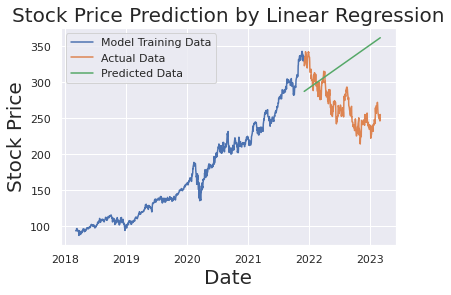

In [ ]:
linear_regression_prediction(df)

# Random Forest Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
x_train = df['Date'].map(dt.datetime.toordinal)
y_train = df[['Close']]

forest = RandomForestRegressor(n_estimators=20,max_features='auto',criterion='squared_error')
forest.fit(np.array(x_train).reshape(-1,1),y_train)

<ipython-input-258-1bd02056068c>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomForestRegressor(max_features='auto', n_estimators=20)

In [ ]:
prediction = forest.predict(np.array(x_train).reshape(-1,1))
# y_pred =forest.predict(xtst)[:,np.newaxis]
# i_d=x_train['region_hash_ts_id'][:,np.newaxis]
# R=np.hstack((i_d,y_pred))
# pd.DataFrame(R).to_csv( './Results.csv',index=False, quoting=3 )
# #np.mean(np.abs(y_true - y_pred))

In [ ]:
prediction

array([ 93.69499965,  93.583     ,  93.8860008 , ..., 248.1255019 ,
       250.91650025, 253.7324958 ])

In [ ]:
def random_forest_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set = df_new.iloc[:int(shape*0.75)]
    test_set = df_new.iloc[int(shape*0.75):]
    print('-----------STOCK PRICE PREDICTION BY RANDOM FOREST REGRESSOR-----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Test Set',test_set.shape)
    train = train_set.reset_index()
    test = test_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal).values.reshape(-1, 1)
    y_train = train['Close']
    x_test = test['Date'].map(dt.datetime.toordinal).values.reshape(-1, 1)
    y_test = test['Close']
    # implement random forest regressor
    model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    test_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(test_set[['Close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Random Forest Regressor', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])

-----------STOCK PRICE PREDICTION BY RANDOM FOREST REGRESSOR-----------
-----------------------------------------------------------------
Shape of Training Set (944, 1)
Shape of Test Set (315, 1)


<ipython-input-234-923f7ada18fc>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



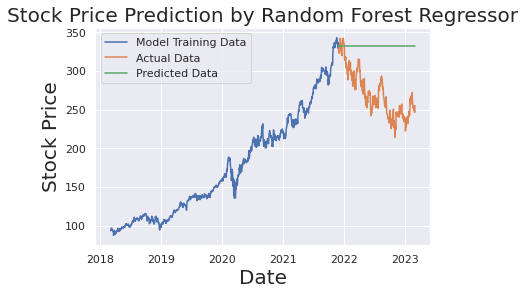

In [ ]:
random_forest_prediction(df)

# Decision Tree Regression


In [ ]:
def decision_tree_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set = df_new.iloc[:int(shape*0.75)]
    valid_set = df_new.iloc[int(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY DECISION TREE REGRESSOR-----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train, test = train_test_split(df, test_size=0.25, shuffle=False)
    train = train_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal).values.reshape(-1, 1)
    y_train = train['Close'].values
    x_test = test['Date'].map(dt.datetime.toordinal).values.reshape(-1, 1)
    y_test = test['Close'].values
    # implement decision tree regressor

    
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    tree_reg = DecisionTreeRegressor(max_depth=10)
    tree_reg.fit(x_train_scaled, y_train)
    # make predictions on test data
    y_pred = tree_reg.predict(x_test_scaled)
    # evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    plt.plot(test['Date'], y_test, label='Actual')
    plt.plot(test['Date'], y_pred, label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Prediction using Decision Tree Regression')
    plt.legend()
    plt.show()
    
    # print evaluation metrics
    print('RMSE:', rmse)
    print('R-squared:', r2)

-----------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY DECISION TREE REGRESSOR-----------
-----------------------------------------------------------------
Shape of Training Set (944, 1)
Shape of Validation Set (315, 1)


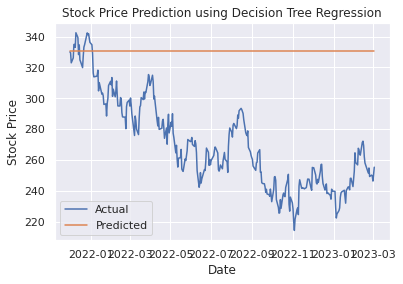

RMSE: 66.9656257066687
R-squared: -4.0344852191483165


In [ ]:
decision_tree_prediction(df)

# K-Nearest Neighbors

In [ ]:
def knn_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set = df_new.iloc[:int(shape*0.75)]
    valid_set = df_new.iloc[int(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1))
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5)
    model.fit(x_train,y_train)
    preds = model.predict(x_valid)
    rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by K-Nearest Neighbors',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

-----------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------
-----------------------------------------------------------------
Shape of Training Set (944, 1)
Shape of Validation Set (315, 1)
RMSE value on validation set: 132.06881777498273
-----------------------------------------------------------
-----------------------------------------------------------


<ipython-input-166-e7f8ea0dee10>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



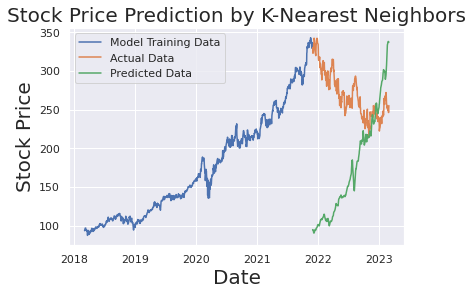

In [ ]:
knn_prediction(df)

# Model Building  - LSTM, RNN?

problem is regrussion based, nerual network based?


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
def lstm_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print('STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)')
    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = Sequential()
    model.add(LSTM(units=32, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=32))
    model.add(Dropout(0.20))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=32, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid['predictions'] = closing_price
    plt.plot(train['Close'])
    plt.plot(valid[['Close','predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)
Shape of Training Set (945, 1)
Shape of Validation Set (314, 1)
29/29 - 6s - loss: 0.0432 - 6s/epoch - 203ms/step
10/10 [==============================] - 1s 11ms/step
RMSE value on validation set: Close    27.79363
dtype: float64
-----------------------------------------------------------
-----------------------------------------------------------


<ipython-input-252-3518d76a8b90>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



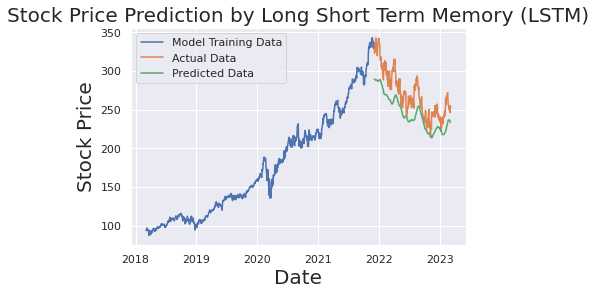

In [ ]:
lstm_prediction(df)

_______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Normalization or standardization?

Normalization: Normalization is the process of scaling the data to have values between 0 and 1. Normalization is usually used when the distribution of data does not follow a Gaussian (normal) distribution, or when the scale of the features is not meaningful. Normalization is done by subtracting the minimum value of the feature from each value and then dividing by the range of the feature.

Standardization: Standardization is the process of transforming the data to have a mean of 0 and a standard deviation of 1. Standardization is usually used when the distribution of the data is Gaussian (normal) or when the scale of the features is meaningful. Standardization is done by subtracting the mean of the feature from each value and then dividing by the standard deviation of the feature.

In summary, normalization rescales the data to the range [0, 1] and is useful when you don't know the distribution of the data or when you want to bound the features to a specific range. Standardization rescales the data to have a mean of 0 and a standard deviation of 1 and is useful when you want to make features comparable or when you are working with a Gaussian (normal) distribution of data.

In [ ]:
#Normalizing close price
closedf = closedf.drop('Date',axis=1)
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1259, 1)


In [ ]:
max_value = closedf.max()
min_value = closedf.min()

print('Maximum value:', max_value)
print('Minimum value:', min_value)

Maximum value: 1.0
Minimum value: 0.0


Preparing the Data for train and test?